In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data science/My projects/Birth analysis and prediction /births.csv')

In [ ]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
df.shape

(15547, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [ ]:
#Total Number of missing values
df.isnull().sum().sort_values(ascending=False)

day       480
births      0
gender      0
month       0
year        0
dtype: int64

In [ ]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()



,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889


In [ ]:
#remove negative values with rows
df=df.dropna()

In [ ]:
#Total Number of missing values
df.isnull().sum().sort_values(ascending=False)

births    0
gender    0
day       0
month     0
year      0
dtype: int64

In [ ]:
#df['births']= df['births'].apply(lambda x: df.dropna() if (x>=1 and x<=500))
df = df.drop(df[df.births< 500].index)
df = df.drop(df[df.day>31].index)
df = df.drop(df[df.month>12].index)


In [ ]:

df['day'] = df['day'].astype(int)

In [ ]:
#df['gender'].str.upper()

In [ ]:
df.shape

(14610, 5)

In [ ]:
df.dropna(axis='index', how='any')# 0 for row, 1 for column
df.shape


(14610, 5)

In [ ]:
df['decade'] = 10 * (df['year'] // 10)
df.pivot_table(df, index='decade', columns='gender', aggfunc='sum')
print(df.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


In [ ]:
import calendar
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])



In [ ]:
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,year,month,day,gender,births,decade,month_name,date,day_of_week
0,1969,1,1,F,4046,1960,Jan,1969-01-01,Wednesday
1,1969,1,1,M,4440,1960,Jan,1969-01-01,Wednesday
2,1969,1,2,F,4454,1960,Jan,1969-01-02,Thursday
3,1969,1,2,M,4548,1960,Jan,1969-01-02,Thursday
4,1969,1,3,F,4548,1960,Jan,1969-01-03,Friday


In [ ]:
df['date'] = df['date'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         14610 non-null  int64 
 1   month        14610 non-null  int64 
 2   day          14610 non-null  int64 
 3   gender       14610 non-null  object
 4   births       14610 non-null  int64 
 5   decade       14610 non-null  int64 
 6   month_name   14610 non-null  object
 7   date         14610 non-null  object
 8   day_of_week  14610 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


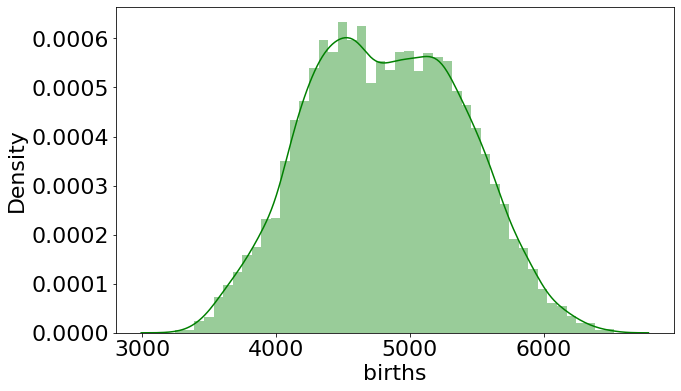

In [429]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.distplot(df['births'],color='g')



Text(0.5, 0, 'Births')

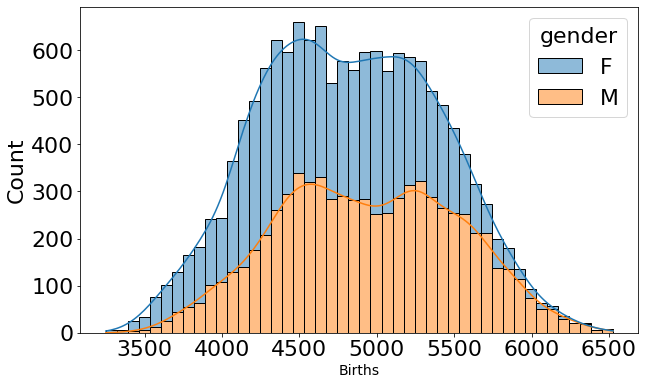

In [428]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
b= sns.histplot(data= df, x='births',hue='gender',kde='True',multiple="stack")
b.set_xlabel("Births",fontsize=14)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

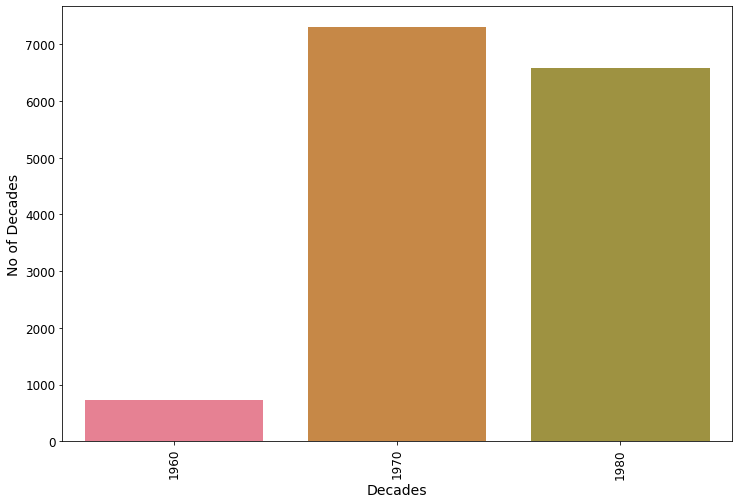

In [440]:
color=sns.color_palette("husl", 10)
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
b = sns.countplot(x='decade',data=df, palette=color,ax=ax)
b.axes.set_title("",fontsize=24)
b.set_xlabel("Decades",fontsize=14)
b.set_ylabel("No of Decades",fontsize=14)
b.tick_params(labelsize=12)
plt.xticks(rotation=90)

# Removing outliers caused by mistyped dates or missing values

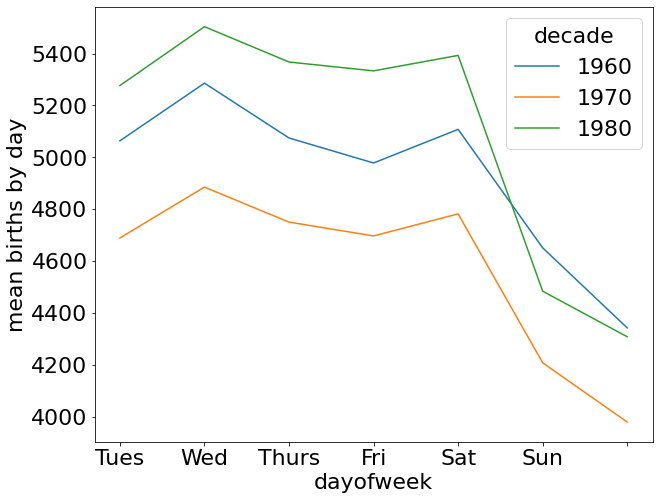

In [458]:
import numpy as np
quartiles = np.percentile(df['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
df = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
df['day'] = df['day'].astype(int)
df.index = pd.to_datetime(10000 * df.year +
                              100 * df.month +
                              df.day, format='%Y%m%d')

df['dayofweek'] = df.index.dayofweek
df.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

6.0
4.0


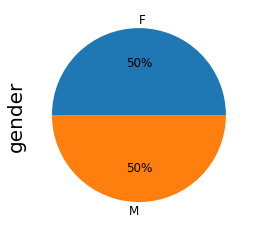

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plt.rcParams.update({'font.size': 22})
plt.ylabel('',fontsize=20)
plot_size[0] = 10
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 
df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%',textprops={'fontsize': 12})

In [ ]:

print("10th percentile of Births", df['births'].quantile(0.1))
print("25th percentile of Births", df['births'].quantile(0.25))
print("50th percentile of Height =", np.median(df['births']))
print("75th percentile of Births", df['births'].quantile(0.75))
print("90th percentile of Births", df['births'].quantile(0.90))


10th percentile of Births 4083.0
25th percentile of Births 4383.0
50th percentile of Height = 4812.0
75th percentile of Births 5259.0
90th percentile of Births 5592.0


In [139]:
print('++++++++Summary++++++++\n')
df['births'].describe()

++++++++Summary++++++++



count    14610.000000
mean      4824.470089
std        579.996983
min       3249.000000
25%       4383.000000
50%       4812.000000
75%       5259.000000
max       6527.000000
Name: births, dtype: float64

In [ ]:
print('Average number of Births:',df['births'].mean())



Average number of Births: 4824.470088980151


In [ ]:
print('Middle number of Births:',df['births'].median())

Middle number of Births: 4812.0


In [ ]:
print('Most occurrence number of Births:',df['births'].mode())

Most occurrence number of Births: 0    4598
1    5226
dtype: int64


In [ ]:
print('Standard Deviation number of Births:',df['births'].std())

Standard Deviation number of Births: 579.9969826875663


In [ ]:
print('Minimum  number of Births:',df['births'].min())

Minimum  number of Births: 3249


In [ ]:
print('Maximum number of Births:',df['births'].max())

Maximum number of Births: 6527


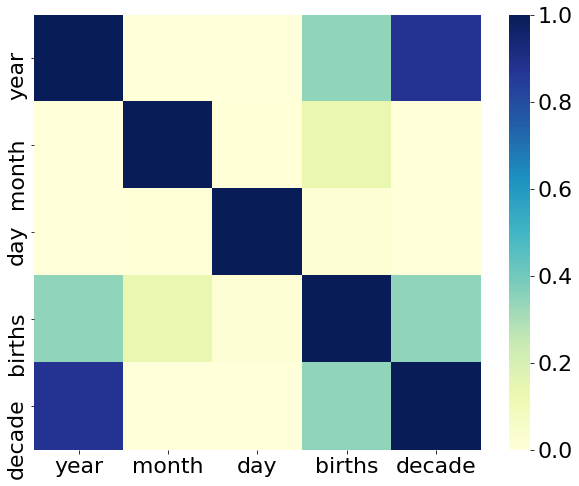

In [142]:
sns.heatmap(df.corr(),cmap="YlGnBu")
#you can find futher color map for heatmap, cmap="YlGnBu" on seaborn website

In [143]:
x = df[['year','month','day']]
y = df[['births']]

In [144]:
y.shape

(14610, 1)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [402]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [403]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
LGR = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
RF = RandomForestClassifier()
svc = SVC(kernel='linear')


In [404]:
# LR.fit(X_train,y_train)
# LGR.fit(X_train,y_train.values.reshape(-1,))

In [405]:

DTR.fit(X_train,y_train)
#RF.fit(X_train,y_train.values.reshape(-1,))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [406]:
#svc.fit(X_train,y_train.values.reshape(-1,))

In [407]:
# pred_ylg = LR.predict(X_test)
pred_ydtr = DTR.predict(X_test)
# pred_ylgr = LGR.predict(X_test)
# pred_yrf = RF.predict(X_test)
# pred_ysvc = svc.predict(X_test)


In [408]:
# score_lg=round(LR.score(X_test,y_test)*100,2)
# score_lgr=round(LGR.score(X_test,y_test)*100,2)
# score_rf=round(RF.score(X_test,y_test)*100,2)
# score_svc=round(svc.score(X_test,y_test)*100,2)
# print('RF Accuracy :',score_rf,'%')
# print('SVC Accuracy :',score_svc,'%')
# print('Linear Regression Accuracy :',score_lg,'%')
# print('Logistic Regression Accuracy :',score_lgr,'%')
# print('Decision Tree Regressor Accuracy :',score_dtr,'%')

In [409]:

score_dtr=round(DTR.score(X_test,y_test)*100,2)
print('Decision Tree Regressor Accuracy :',score_dtr,'%')

Decision Tree Regressor Accuracy : 69.09 %


In [418]:
new_input = [[1999,3,7]]
print(DTR.predict(new_input))

[5268.]


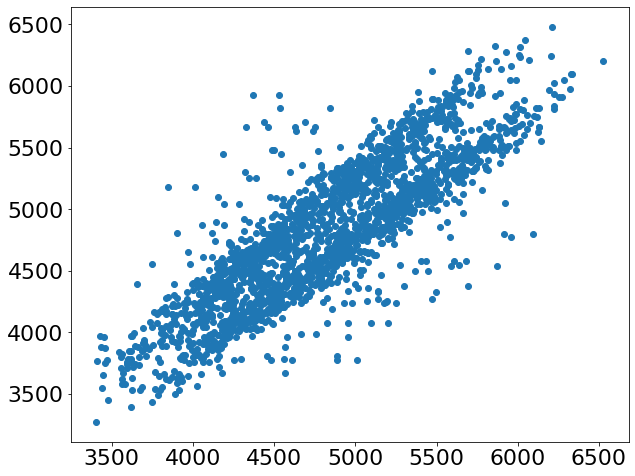

In [419]:
plt.scatter(y_test,pred_ydtr)

In [424]:
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test, pred_ydtr),2)) 
print('MSE:', round(metrics.mean_squared_error(y_test, pred_ydtr),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred_ydtr)),2)) 

MAE: 268.53
MSE: 106363.35
RMSE: 326.13
